# COMP3222/6246 Machine Learning Technologies (2023/24)
# Lab 1 – Basics of Machine Learning project

In this week, we will have an overview of how a practical Machine Learning project works. We aim to familiarise you with the general procedure of doing Machine Learning, while encouraging you to develop your critical thinking by asking you some questions now and then. It also provides an introduction to Scikit-learn, an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

In general, a Machine Learning project is not different from a software project, where you might want to go back and forth and tweak something, or roll out the first prototype and improve on it incrementally. Answering the questions will help you understand more, and allow you to come up with an idea for improving the Machine Learning prototype we introduced here.

This exercise is based on the one featured in Chapter 2 of the course's text book.  https://southampton.on.worldcat.org/oclc/1347020175. It is simplified in some aspects to fit into two hours of effort, and to fit the structure of the material given in the lectures. We also add a few additional explanations of our own that we believe make things clearer regarding how Scikit works, and some exercises of our own. As an additional activity , you may read the chapter in question and follow along the linked notebook (In Google Colab). There are some bits of it like the Data Pipelines, that we will cover in following weeks.  

Note that you will not learn by simply executing this notebook without thinking a bit for yourself :)

In [1]:
#This cell is to check we have the right versions of the tools we 
import numpy as np
import pandas as pd
import sklearn as sk

print("Numpy version: {} should be >=1.24".format(np.__version__))
print("Pandas version: {} should be >=2.0".format(pd.__version__))
print("Scikit version: {} should be >=1.3".format(sk.__version__))


Numpy version: 1.26.1 should be >=1.24
Pandas version: 2.1.2 should be >=2.0
Scikit version: 1.3.2 should be >=1.3


## Machine Learning Checklist

The textbook suggest (Appendix A) the following high level checklist to tackle Machine Learning Projects

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system

In this session we will review steps 1-4 and the start of 5 (implement a single model). Next week we will delve deeper in steps 5) and 6).

We will only touch upon step 7) briefly. This is more a concern of Data Visualisation, a module that some of our MScs are taking. It is optional Part IV for those undergrads that proceed to MEng.

Step 8) is out of scope.

## Frame the problem and big picture

Although one can derive great pleasure from engineering ML models that beat hard benchmarks and win Kaggle challenges, the  reality is that most of you will be either hired to solve a company's problem, or become entrepreneurs to solve a customer's problem.

In any case, it is essential you frame the problem that you will be solving in the business need of the company/customer. Otherwise, you may end up with an accurate an efficient model that is absolutely useless for the people paying your salary.
You also aim at answering the following technical questions:

* How the problem is currently solved? The point here is to get a baseline against which compare your model
* What kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? 
* Is it a classification task, a regression task, or something else? (Maybe not even an ML model!!) 
* Should you use batch learning or online learning techniques?


In this exercise, we imagine we have been hired by a Real State company interested in investing in the State of California, USA. They want to **predict the median housing price in a district** to assess if it's worth to buy property in a given district. Currently, a team of experts do it manually, but a recent evaluation found that they were off by 30%.... prompting management to approve your hiring to improve the situation. They would like to start the experiment using census data, that is openly available and includes the per district median house pricing at a given year, plus additional demographic information such as population, median income and median age of the houses.

An how the company would use it? Elsewhere, they have a vey good estimation of the expected changes in districts' demography. For example, when they get word a large company is establishing headquarters in a certain district, they predict the population and median income will increase 10% and 5% respectively in 5 years, then, use your model to predict the median house pricing of this "future state of the district" to assess if they should buy some houses now to reap benefits in 5 years. [Note the textbook has a different valid context] 





## Getting the dataset

In this exercise, this step is very easy, as management already pointed out what is the dataset they would like to use. Unfortunately, you are not always that lucky. Data collection is a very important process, several orders of magnitude more laborious than typing Scikit commands while sipping a frappuccino [1] , and strongly dependent on the business scenario.

Think about all the effort needed to collect the data of this example: knock every door and get people tell you the number of dwellers and annual income; extract the data on housing age from the councils; scan sale contract pdfs to get houses' prices......

Your analysis might reveal that more data is needed, or a different data is needed. Assessing how much collecting that data could cost and the potential increase in accuracy is an important part of framing yourself in the big picture. 

We will use census data provided in the textbook.

(Note: In the textbook, this is the part where they explain Jupyter Notebooks, that we already covered last week.)



[1] BTW, remember only water bottles in the lab!

In [2]:
# Jane, the ever efficient Data Engineer of the team, has kindly provided the script below
# to download and decompress the data from its current location into a local folder for your peruse in your
# local notebook.
# Details are out of scope. 
# If you feel this is cooler than models, you might become a Data Engineer in the future! (they get well paid too)
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))



After running the above, you should have now a folder "datasets" in the same folder where the lab's ipynb file is. Inside that, a "housing" folder, and inside that a housing.csv.

Moreover, as Jane took this module before deciding to change her career path, she knows about pandas, a library for data analysis and statistics that is very helpful for doing dataset exploration. She used the method read_csv to load housing.csv into a DataFrame, an in-memory structure where is very easy to analyse.    

You owe Jane a frappuccino. A big one. With extra syrup.

Wile she drinks, read the 10min introduction to Pandas https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html to familiarise with the concepts of Series and DataFrames and what you can do with them. You will notice numpy arrays from last week form the basis of Series and DataFrames, and that many of the operation you learned last week for arrays also apply to Series and DataFrames.

If you need to run some of the examples in the guide, create a cell below and have fun.  


## Exploring the dataset

Now you have the dataset loaded in memory, it's time to interrogate it. You are asking it:

* What type of variables it has (*numerical* or *categorical*?). 
* How many data points useful for my problem?
* Are there missing values? If so, in what variable(s)? how many?
* Has any variable been transformed or manipulated before it got to you?    

This is where pandas adds value over pure numpy, offering a number of convenient methods to calculate descriptive statistics.  

Skim over the DataFrame methods for 
* underlying data https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data, and
* descriptive stats: https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats

and find the right one to implement desired interrogation of the housing variable.


In [3]:
housing = load_housing_data()
# Number of columns and number of rows 

numRows, numCols = housing.shape
print(f"Rows: {numRows}, Columns: {numCols}")


Rows: 20640, Columns: 10


In [4]:
# Print a concise summary of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Variables of dtype object are usually categorical (except if there was an error loading the dataset) 
# List the different values of the categorical variable in 'housing' and count the occurences

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# One variable appears to have some null values
# Create a dataframe with the rows that have the value of that variable = null  
# Hint: read this https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

no_bedrooms = housing[housing["total_bedrooms"].isna()]

In [7]:
 

no_bedrooms.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [8]:
# generate descriptive statistics of the housing dataset 

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

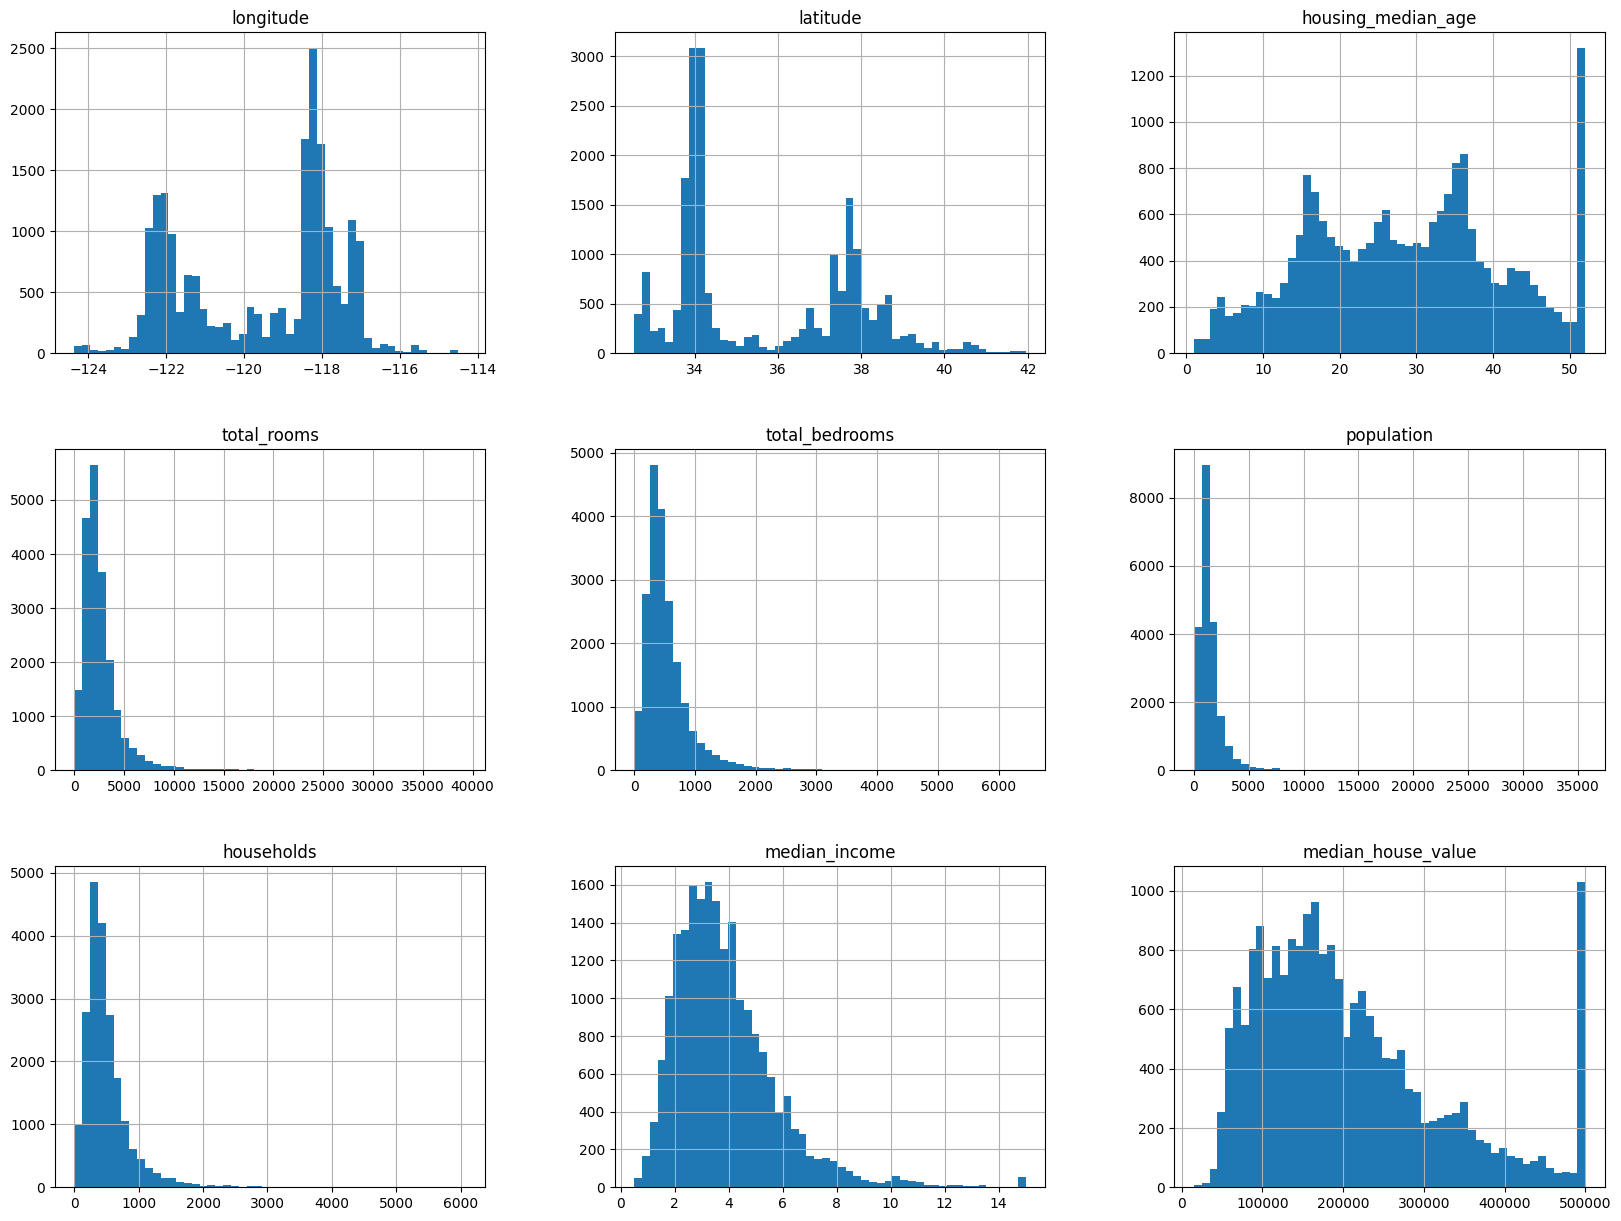

In [9]:
# Another way to get more insight is by plotting histograms
# If you don't remember what a histogram is, go here https://chartio.com/learn/charts/histogram-complete-guide/
# Use the hist command to for each variable, plot a histogram with 50 bins and a 20x15 size.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

housing.hist(bins=50, figsize=(20,15)) 
# You may try experimenting with different number of bins to discover other patterns.


Now that we have the numbers and the figures, it's time to answer the questions we set up at the beginning

* The type of variables it has (*numerical* or *categorical*?): 
    6 numerical, 2 geographical, 1 categorical 
* How many data points useful for my problem?
    Initially all 20640, because all contain the target variable median_house_value:   
* Are there missing values? If so, in what variable(s)? how many?:
    207 data points miss the total_bedrooms variable. If we believe total_bedrooms a useful feature for our model, something will have to be done with those data points.
* Has any variable been transformed or manipulated before it got to you? :   
   This one is for you ;). Based on the stats and the histograms, what three variables have been manipulated before you? (hint, two of them have the same problem)
   
  1. median income has very low values, it has been scaled by 10000 and capped at max. 15 (150000) and min 0.5 (5000)
  2. housing_median_age has been capped at max 52 years 
  3. median_house_value has been capped at max 500000

## Defining the problem and a performance measure

After our exploration, we are ready to define our problem. For that we need to answer the following questions.

1) is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task?
2) is it a classification task, a regression task, or something else?
3) should you use batch learning or online learning techniques? 


The answers for our case are:

1) Supervised, we can train with labeled examples
2) Regression, since the model will be asked to predict a value. In particular, multiple regression since multiple features will be used for prediction. It is also univariate prediction as we are only predicting a single value per district.
3) Batch learning, as the data is small and does not change rapidly


The next  pick a performance measure of our Machine Learning algorithm beforehand. There are a number of performance measures for regression task, but we will just use the Root Mean Square Error (RMSE) for now.

$$\text{RMSE} \left( \mathbf{Y} , \mathbf{\hat{Y}} \right) = \sqrt{\frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 } $$

where $\mathbf{Y}$ and $\mathbf{\hat{Y}}$ are an $n$-sized vector of true values and an $n$-sized vector of predicted values which comprises of $y_i$ and $\hat{y_i}$ respectively for each datapoint $i$. In other words, RMSE is computed from a square root of an average squared error.

Another well-known performance measure is the Mean Absolute Error (MAE), which is computed by taking an average of an absolute value of the error.

$$\text{MAE} \left( \mathbf{Y} , \mathbf{\hat{Y}} \right) = \frac{1}{n} \sum_{i=1}^n | y_i - \hat{y_i} | $$

Go to page 43-45 of the textbook https://southampton.on.worldcat.org/oclc/1347020175 and understand the difference between the two. What rule of thumb can be used to choose the most appropriate? 

What statistical plot would you use to apply that rule of thumb to the housing dataset? (use external resource if you don't remember) 

Hint: Check plots available in pandas here https://pandas.pydata.org/docs/reference/frame.html#plotting 

Hint2: You can Google it if you don't remember.



<Axes: >

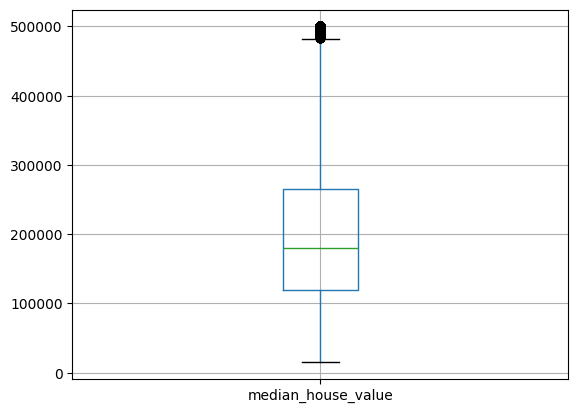

In [10]:
#answer here
housing.boxplot(column='median_house_value')



## Data cleaning: missing values and capped values

Our exploration concludes that we have one variable with missing values, two variables with capped values (including the target one) and one scaled down variable. The most important issue is the cap on the target variable. Your models may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:

 1. Collect proper labels for the districts whose labels were capped.
 2. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).
 
 The second most important issue is missing data in a variable, the options are, in order of consideration,:
 
  1. Collect proper labels for those districts
  2. Decide that you don't use that variable as a feature of your model 
  3. Replace the null value with a sensible non-null value
  4. Discard all data points with null-values  
  
  
  Sadly, we already know option (1) is too expensive in our case, we can't run the census again on those districts. 
  
  To assess option (2) you need a combination of technical and business knowledge. From a technical point of view, you can calculate the correlation between the target variable and the variable you are considering discarding. 

In [11]:
# use the corr method to compute the correlation between all pairs of variables in the housing DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# you may need to workaround the categorical variable in the dataset   


corrMatrix = housing.corr(numeric_only=True)
print(corrMatrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

Correlation is quite low, but that cannot be the only factor, you need business. Jim from Business confirms that despite the fact that there is low correlation total_bedrooms is something they can predict accurately in the future, so they are keen to check if it's an useful variable or not and they'd rather you keep it. They also confirm there is no sensible non-null value to replace the missing data, so you are left with option (4), discard the null data points. 

Furthermore, they'd also like to have predictions for housing ages greater than 52 and house values greater than 500k, so those data points must go too. Jim is sorry about all the extra work for you. You hang up the Teams call.


In [12]:
# Using an appropriate filter, discard data points with null total_bedrooms, housing_median_age >= 52 and median_house_value=500001  
 
fltr_idx= (housing["total_bedrooms"].notna()) & (housing["housing_median_age"] < 52) & (housing["median_house_value"] <= 500000)
fltr_housing = housing[fltr_idx].reset_index(drop=True) # This bit resets the indexes of the DataFrame
fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [13]:
# We then check the descriptive stats again

fltr_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18379 non-null  float64
 1   latitude            18379 non-null  float64
 2   housing_median_age  18379 non-null  float64
 3   total_rooms         18379 non-null  float64
 4   total_bedrooms      18379 non-null  float64
 5   population          18379 non-null  float64
 6   households          18379 non-null  float64
 7   median_income       18379 non-null  float64
 8   median_house_value  18379 non-null  float64
 9   ocean_proximity     18379 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [14]:
fltr_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000,18379.000000
mean,-119.484954,35.593833,26.969422,2669.597965,548.003972,1469.890690,508.613145,3.693698,189563.469014
std,1.980713,2.148148,11.433039,2227.810560,429.431372,1163.864204,389.550323,1.569676,95763.629783
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1458.000000,300.000000,811.000000,284.000000,2.537000,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.470500,171200.000000
75%,-117.970000,37.670000,36.000000,3182.000000,659.000000,1779.000000,614.000000,4.616700,243200.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

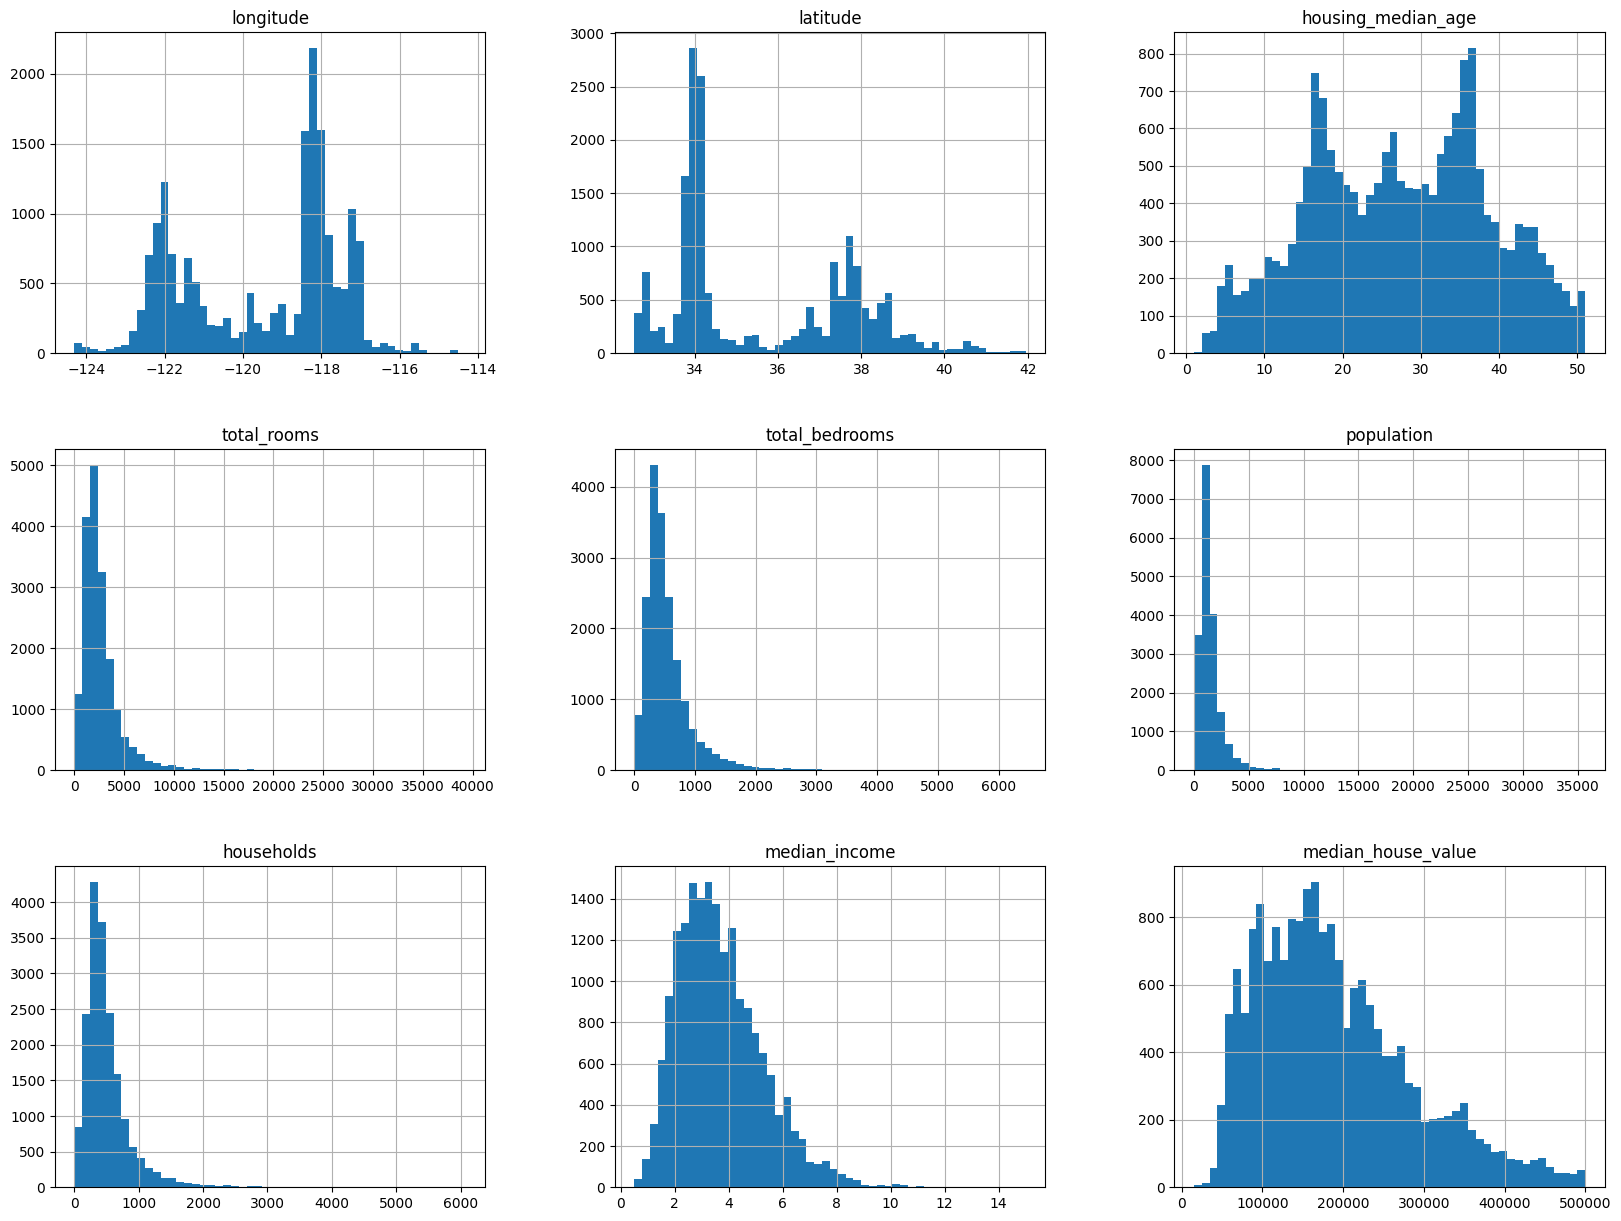

In [15]:
fltr_housing.hist(bins=50, figsize=(20,15)) 

#plt.show()

## Dealing with categorical attributes

The final data issue we have is the categorical attribute 'ocean_proximity'. Since most Machine Learning algorithms work on numerical vectors and matrices only, we need to transform the categorical attribute to a sensible numerical value that still represent its original meaning.

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoded_cat, categories = fltr_housing["ocean_proximity"].factorize() # retrieve the attribute encoded as numbers
encoded_cat_arr = OneHotEncoder().fit_transform(encoded_cat.reshape(-1,1)).toarray() # transform sparse matrix to NumPy array
enc_fltr_housing = fltr_housing.iloc[:,0:9].copy()
for i in range(0, len(categories)):
    enc_fltr_housing[categories[i]] = encoded_cat_arr[:,i]
enc_fltr_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1.0,0.0,0.0,0.0,0.0
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1.0,0.0,0.0,0.0,0.0
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,1.0,0.0,0.0,0.0,0.0


We have just finished transforming each categorical value to a vector of binary values. As an alternative, we could have only a single numerical attribute that maps to the categories; e.g. 1 for 'NEAR BAY', 2 for '<1H OCEAN', etc. Compared to having a vector of binary values, what are the pros&cons of this approach? Will there be any problem later if we use this approach?

## Data partitioning: train set and test set

A critical part of a Machine Learning project is to separate the available data into a training set and a test set. The most common way of splitting is randomly selecting a sample of 20% as the test set. However, it is important to ensure your split is reproducible, i.e, remains the same for the duration of your project. Otherwise, if you run the notebook the enxt day, you would have scrmabled everything!

Use the Scikit-learn's train_test_split method to split the fltr_housing dataset in 80% training and 20% test in a reproducible manner
 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Note: The textbook splits the dataset earlier than us, that is indeed better but it has the caveat that if you do transformations to the training set (e.g. one hot encoding) you have to remember them so you apply them to the test set. We will cover how to do this next week.

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(enc_fltr_housing, test_size=0.2, random_state=42)


## Primer on Scikit-learn

Read this slides to learn the basics of Scikit main objects [https://sotonac-my.sharepoint.com/:p:/g/personal/ldig1y14_soton_ac_uk/EdXSXBLzyzNBr7ZqJ3U04bMBe6Vo9xaBuVknXzH4-lMp4g?e=8kawpV]

## Choose and apply Machine Learning algorithm

After so much work on preparing our dataset, we are ready to try our Machine Learning algorithm. Whilst there are many algorithms or *models* for regression task, let us apply the basic approach first: the Linear Regression algorithm. In many cases, a simple model such as the Linear Regression works perfectly fine. If the simple model is sufficient, then there is no need to apply complex algorithms which could require the tuning of many hyperparameters, larger number of datapoints, or longer time to train.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Make sure you understand what we are doing here
# Describe each line with a comment
lnr_regressor1 = LinearRegression()
lnr_regressor1.fit(train_set.iloc[:, [idx for idx in range(len(train_set.columns)) if idx != 8]], train_set['median_house_value'])
prediction = lnr_regressor1.predict(test_set.iloc[:, [idx for idx in range(len(test_set.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set['median_house_value'], prediction)))

RMSE =  59798.23584798086


We have just trained a linear regression model based on our training set. Then, we have used it to predict the house price on our test set, and we have computed the RMSE to quantify how good our model is. Clearly, the RMSE we have got is very high. That implies that our Machine Learning algorithm is not performing well enough. Will the RMSE change if we redo everything again? What could have gone wrong? What could be done to improve our accuracy?

## Feature engineering

We have just finished our first prototype, but it doesn't seem to work well. As someone say: 'Garbage in, Garbage out'! So, it could be the case that our dataset is not comprised of useful attributes that are going to help our Machine Learning algorithm to learn and predict well. 

Besides your earlier discussion with Jim about what features should be discarded, it is also possible to experiment with combinations of attributes. Speaking of Jim, he just sent you an email. He has been thinking about it and from a business perspective you don't care much about district's total rooms and total bedrooms, you care about number of rooms per houes, ratio of bedrooms over rooms, and number of people per house. Let's engineer the features and see how much our Machine Learning algorithm will improve. 



In [21]:
# Create a copy of the training set train_set2 and add three columns
# with number of rooms per house, ratio of bedrooms over rooms, and number of people per house

train_set2 = train_set.copy()
train_set2['room_per_house'] = train_set2['total_rooms']/train_set2['households']
train_set2['bedroom_per_room'] = train_set2['total_bedrooms']/train_set2['total_rooms']
train_set2['pop_per_house'] = train_set2['population']/train_set2['households']
train_set2.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
1310,-117.67,34.02,16.0,3042.0,524.0,1516.0,475.0,4.8906,178500.0,0.0,0.0,1.0,0.0,0.0,6.404211,0.172255,3.191579
16156,-117.08,33.12,43.0,107.0,44.0,107.0,48.0,0.7054,137500.0,0.0,1.0,0.0,0.0,0.0,2.229167,0.411215,2.229167
10301,-117.11,32.75,34.0,2131.0,594.0,1373.0,562.0,2.1130,102100.0,0.0,0.0,0.0,1.0,0.0,3.791815,0.278742,2.443060
8823,-118.15,34.17,36.0,930.0,280.0,1024.0,300.0,1.0846,146400.0,0.0,1.0,0.0,0.0,0.0,3.100000,0.301075,3.413333
10428,-117.69,33.60,12.0,3258.0,421.0,1464.0,435.0,6.5413,332000.0,0.0,1.0,0.0,0.0,0.0,7.489655,0.129220,3.365517


In [22]:
# Create a copy of the test set test_set2 and add three columns
# with number of rooms per house, ratio of bedrooms over rooms, and number of people per house

test_set2 = test_set.copy()
test_set2['room_per_house'] = test_set2['total_rooms']/test_set2['households']
test_set2['bedroom_per_room'] = test_set2['total_bedrooms']/test_set2['total_rooms']
test_set2['pop_per_house'] = test_set2['population']/test_set2['households']
test_set2.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,room_per_house,bedroom_per_room,pop_per_house
10163,-118.25,33.89,35.0,1582.0,391.0,1957.0,404.0,2.4537,91500.0,0.0,1.0,0.0,0.0,0.0,3.915842,0.247155,4.844059
6667,-119.42,36.35,20.0,1469.0,303.0,1031.0,259.0,1.6645,48000.0,0.0,0.0,1.0,0.0,0.0,5.671815,0.206263,3.980695
7931,-117.04,32.68,9.0,3087.0,609.0,1530.0,556.0,3.7750,125000.0,0.0,0.0,0.0,1.0,0.0,5.552158,0.197279,2.751799
2748,-118.13,34.07,20.0,2130.0,654.0,1870.0,578.0,2.3664,192200.0,0.0,1.0,0.0,0.0,0.0,3.685121,0.307042,3.235294
1456,-122.51,37.58,20.0,64.0,21.0,59.0,21.0,2.2375,450000.0,0.0,0.0,0.0,1.0,0.0,3.047619,0.328125,2.809524


In [23]:
# Create a new Linear Regression estimator on the new dataset, fit, predict and evaluate.

lnr_regressor2 = LinearRegression()
lnr_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction2 = lnr_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set2['median_house_value'], prediction2)))

RMSE =  58942.80249389643


Whilst the improvement is not that significant, it has shown that *feature engineering* is very useful. There are more techniques than those we have just shown. Could you name some?

## Choose and apply Machine Learning algorithm (again)

It is possible that the Linear Regression model is not powerful enough to learn from our dataset. We could try different regression models: say, the Random Forest Regression. With Scikit-Learn, we can try many different algorithms easily.

In [24]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor1 = RandomForestRegressor()
frst_regressor1.fit(train_set.iloc[:, [idx for idx in range(len(train_set.columns)) if idx != 8]], train_set['median_house_value'])
prediction3 = frst_regressor1.predict(test_set.iloc[:, [idx for idx in range(len(test_set.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set['median_house_value'], prediction3)))

RMSE =  44081.392494019354


With the Forest Regression model, we have achieved a good improvement on the non-engineered dataset. Now, we could also try it on the engineered dataset.

In [25]:
from sklearn.ensemble import RandomForestRegressor

frst_regressor2 = RandomForestRegressor()
frst_regressor2.fit(train_set2.iloc[:, [idx for idx in range(len(train_set2.columns)) if idx != 8]], train_set2['median_house_value'])
prediction4 = frst_regressor2.predict(test_set2.iloc[:, [idx for idx in range(len(test_set2.columns)) if idx != 8]])
print('RMSE = ', np.sqrt(mean_squared_error(test_set2['median_house_value'], prediction4)))

RMSE =  45060.71991111275


It seems that the engineered dataset degrades the performance of Random forest regression! This is very unlikely since Random forest regression is more powerful than the linear regression. Is it possible to tune the parameter of a Machine Learning algorithm to achieve better accuracy?

## Recap

We have just demonstrated how to carry out a Machine Learning project on a given dataset. Specifically, a multivariate regression task in a supervised model-based batch learning framework. We have shown that a dataset needs to be properly inspected and some data cleaning techniques performed before applying any Machine Learning algorithm. Significant improvement can be obtained by not only changing the Machine Learning algorithm but combining it with feature engineering. There are a number of things that we have not covered here, but you can learn them by trying our exercises below.

## Exercises (it's OK if you can't complete them all today)

1. We discussed earlier the difference between RSME and MAE but What can be implied if RMSE is significantly higher than MAE? Is it true for this house prediction problem? (You can try compute the MAE in the cell below.)

_Hint_: Since both RMSE and MAE is a measure to quantify error in regression task, we need to apply them in different type of numerical predictions that our Machine Learning model can make in order to see their difference. Try the following.
- Create a vector of 1000 or more numerical values. (These can be the same value or different values.) We will treat this vector's as true target values that our Machine Learning model needs to predict as accurate as possible.
- Generate a vector of the same size where this new vector's values has a normal (Gaussian) distribution with zero mean and a unit variance. (You can use numpy.random.normal().) Visualise the distribution of these values with a histogram. We will treat them as errors that our Machine Learning model make.
- Duplicate the true target values and apply this Guassian errors to them simply by pairwise summing.
- Compute RMSE and MAE from the noisy prediction and the true target values.
- Repeat the same process by trying different means and/or variances of the Gaussian noise and then compute RMSE & MAE. You can also try a uniformly random noise as well. What did you see when you have errors with a non-zero mean and/or a large variance?

2. Instead of dropping some datapoints that have missing values, we can try and fill them with a median of that attributes. Will the performance measure increase?

_Hint_: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

_Extra hint_: Do you think that a median is always an appropriate value to use? What's about a mean or a mode? Which one would be appropriate for normally (Gaussian) distributed attribute? Which one would be appropriate for log-normal distribution or long-tailed distribution? (Search for a figure of these distributions on Google. It's useful for you to know at least what the shape of these distributions are and how frequent we can expect for each value in the distribution's range.)

_Extra extra hint_: Will our Machine Learning model always benefit from having these datapoints with filled attributes? How? What if the proportion of these datapoints is more than 50%? Also, what if the attribute is one of the main factors that affects the target value (e.g. number of rooms and a house price)? Will our Machine Learning model still be able to use and learn from such filled attributes?

3. What is the consequence of ignoring the datapoints with a capped value in our dataset?

_Hint_: By discarding those datapoints, you won't have them to let the Machine Learning model learn. When you roll out your Machine Learning project, what will then happen with a prediciton for inputs with those capped values?

4. Instead of encoding a categorical attribute into a number of binary attributes, will our performance measure increase if we encode it into one attribute with each value representing one category? What could be a reason for such improvement?

_Hint_: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.factorize.html

_Extra hint_: What is the difference between ordinal data and categorical data? Can categorical data always be ordered according to some metrics? What will then be a consequence of coding categorical data into a numerical value?

5. In many dataset including ours, different attributes have different ranges of value. Whilst our Machine Learning algorithm can cope with this issue to certain degree, it is widely known that either standardisation or normalisation should be applied. Try them separately on some attributes in our dataset, and observe any change in the performance measure.

_Hint_: http://scikit-learn.org/stable/modules/preprocessing.html

6. We had randomly partitioned the dataset into the train set and the test set. It might be the case that we were lucky and randomly chose a test set that yielded a very low RMSE. To properly evaluate performance of our Machine Learning algorithm, you should try using all datapoints in your dataset as a test set and make sure that the RMSE is significatly low. This is called 'Cross-Validation.' Try it with our dataset and one Machine Learning model.

_Hint_: http://scikit-learn.org/stable/modules/cross_validation.html

7. Many Machine Learning algorithms including the Random Forest Regression have a number of parameters to tune. Try tuning our Random Forest Regressor so that it achieves the lowest RMSE.

_Hint_: Instead of manually tuning these parameters, you can try a search such as a grid search (http://scikit-learn.org/stable/modules/grid_search.html) to find a good combination of parameters.

8. In practice, after training your first prototype, you are likely to acquire new datapoints or update your existing datapoints. How can you utilise them to improve your Machine Learning algorithm?

_Hint_: Do those new datapoints significantly different to the previous one? If they do, you need to make your Machine Learning algorithm adapt to these new datapoints.